# <center> <a style="color:#6699ff">  DataCamp Project - Predicting the number of Traffic accidents occuring in New York City</a> </center>

<img src="img/1.jpg" width="1000">

#### <center> <strong> Authors </strong>:  <em>KUEVIAKOE Ruth - BOUGHALEM Dounia - SLAOUI Reda - RENAULT Mathieu - HOURS Henri</em></center>

#### <p> <center> <strong> M2 DataScience - Université Paris Scalay </strong>   </center>      <p>                   

_______________________________________________________________________________

# <a style="color:#6699ff">  General Outline</a>

##  <a href="#I.-Business-case" style="color:#6699ff"> I. Business case</a>

1. Introduction: Few facts and figures
2. Business case presentation 
3. Benefits / KPIs 
4. Data sources
5. Business Metric

##  <a href="#II.-Exploratory-Data-Analysis" style="color:#6699ff"> II. Exploratory Data Analysis </a>

1. Statistics / Visualisations 

##  <a href="#III.-Model-to-submit" style="color:#6699ff"> III. Model to submit </a>

1. Workflow
2. Feature Extractor
3. Baseline Regressor
4. Evaluation

##  <a href="#IV.-Submitting-on-RAMP" style="color:#6699ff"> IV. Submitting on RAMP </a>

_______________________________________________________________________________

#  <a style="color:#6699ff">I. Business case</a>


## 1. Introduction: Few facts and figures / Context
_What is the actual context?_

New York City is a prime example of a bustling metropolitan: with close to 9 Million inhabitants and a population density of 27,000 people per square mile, the big apple is one of the world's most congested cities in terms of traffic. More importantly, the city registers close to 200 000 yearly vehicule collisions across the five boroughs during one year. 22% of these accidents leads to injuries.According to the New York Police Department, the traffic accidents caused injuries to more than 35,000 drivers and passengers, nearly 11,000 pedestrians, and 3,900 cyclists in 2014 alone.

<img src="img/img1.png" height="650" width="650">

On average, more than three people died in car accidents every day in New York and 48 were injured. The number of injured and killed are less compared to the number of accidents, but, the losses don't stop here.There is also the hospitalization to take into account : On average there were 637 hospitalizations each year due to motor vehicle traffic-related pedal cyclist injuries, hospitalizing 3.2 of every 100,000 New Yorkers in 2014.  In 2013, the total costs of crash-related deaths in New York were estimated to close to 1.6 Billion dollars making the reduction of vehicule collisions and especially eliminating traffic deaths a priority for the state of New York. 
<br><br>
Indeed in 2014, the mayor Bill de Blasio launched an action plan, [Vision Zero](http://www.nyc.gov/html/visionzero/pdf/nyc-vision-zero-action-plan.pdf), to eliminate all traffic deaths in the Big Apple by 2024. This ambitious goal needs to know where the accidents will be to prevent them.


## 2. Business Case presentation / Goals and Objectives: 
_What problem are we looking into? why?_

One way to impact significantly the toll of traffic incidents is to predict in advance highly possible locations of vehicule collisions as well as estimate a time for these incidents. This will allow the rescue services to anticipate the necessery human and material ressources per location and time frame and to dispatch the intervention teams ( police squad, medical support, etc... ) in a more efficient manner. Moreover, it will allow the police to prevent accidents by better targeting the locations of control check points. 
We wish to make predictions on an hourly basis and on locations that makes sense to the intervention teams.

Taking a look at the layout of NYC, the space is divided into five major districts: Manhattan, Brooklyn, Queens, Bronx and Staten Island. Each borought is itself split into several zones, where each zone is identified by a distinct Zip Code and a precise spacial delimitation (more details on Zip Codes [here](http://www.city-data.com/zipmaps/New-York-New-York.html)). We will attempt to predict the number of accidents to occur per zone ( a.k.a per Zip Code ) per hour in NYC based on several data sources we gathered. 
NYC has a total of more than 240 Zip Codes, each zone covers on average a 5.4 km² area which makes it a reasonable spatial unit. 

This predictive module can serve as a decision support tool that can be integrated to the current intervention schemes of the NYPD, allowing the city to target resources and interventions where they are most needed while also anticipating future urgencies. Human supervision is necessery as the system doesn't take into account the evolution of the available ressources and the state of the ongoing interventions. 

## 3. Potential Benefits / KPIs to be improved: 
_How will the city benefit from this? What KPIs are we trying to optimize ?_

Some of the KPIs that can help us track the impact of this project are the following:

- Reduce the total number of accidents occuring in NYC ( KPI= number of accidents per zone/hour ) 
- Reduce the number of deaths and severe injuries related to traffic incidents ( KPI= number of deaths/injuries per zone/hour ) 
- Reduce the costs of vehicule collisions for the City ( KPI= total cost of accidents per zone/hour ) 
- Reduce the delay between the occurance of the accident and the effective intervention of the teams on site (KPI= Average intervention time )

## 4. The Data Sources:
_What data sources were used? with what preprocessing? what is the final dataset?_

**The dataset that we put together is compiled from different data sources (7 different datasets)**

In order to predict the occurance of accidents in NYC, we started by looking at several datasets available on the the following website [NYC Open Data](https://opendata.cityofnewyork.us/). The NYC Open Data initiative was set up a few years back to provide New Yorkers with multiple datasets and reports concerning Education, Health, City Government and Environment issues in NYC. 

### 4.1. The Historical collision data


We extracted from this [source](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95), historical data of vehicule collisions in the city of New York reported by the NYPD available (1.430.000 rows and 29 columns). <br>
Each record represents a collision in NYC, with its characteristics: borough, precinct and cross street, date and hour, vehicles involved, number of killed or injured,.... The exact coordinates (longitude, latitude) are also available, however we wish to provide predictions of collision locations by zip codes.<br>
For this reason, we crossed (using spatial join) the NYPD dataset with a dataset with actual boundaries of Zip Codes available [here](https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u), in order to aggregate the collisions by zipcode. 
<br><br>
It forms the base of our dataset, that is the index and the target:
<br><br>
**Index**
<ul> <li>ZIPCODE: index of the zipcode (integer), refers to the 248 differents ZIPCODE of the zipcode dataframe
    </li><li>DT: hourly datetime (timestamp), between '2012-07-01 00:00:00' and '2015/03/06 00:00:00' for the train set, and '2015/03/06 01:00:00' and '2016/01/03 00:00:00' for the test set.
 </li></ul>

**Collison Records: the target**
<br>

<ul> <li>n_collisions: number of collisions for the considered hour in the considered zipcode
    </li><li>n_injured: number of injured people (non useful)
    </li><li>n_killed: number of killed people (non useful)
 </li></ul>


### 4.2. Complementary Data

On top of the history of incidents, we gathered information relative to the weather, the traffic as well as the ongoing complaints: 


#### Weather data
The weather data were gathered through the [weathersource Rest API](https://developer.weathersource.com/) requests. We concatenated 35 individual sets to get the following features related to several metrics such as the local temperature, the wind speed, the snowfall etc...  
<br>
_Weather data : 21 features_
<br>

1 dataset per year and per county (35 datasets downloaded and concatenated, and duplicated for all ZIPCODES in the considered county)<br>
<ul> <li>cldCvr: Cloud cover as a percent value (Percent, between 0 and 100)
    </li><li>dewPt: The dew point (degrees Fahrenheit)
    </li><li>feelsLike: The “feels like” temperature (degrees Fahrenheit)
    </li><li>heatIndex: The heat index (degrees Fahrenheit)
    </li><li>mslPres: The Mean Sea Level Pressure (millibars)
    </li><li>precip: Total precipitation ($\frac{1}{100}$ inches)
    </li><li>presTend: The Pressure Tendency ($\frac{1}{10}$ millibars)
    </li><li>radSolar: The Solar Radiation (watts per square meter)
    </li><li>relHum: The relative humidity (Percent, between 0 and 100)
    </li><li>sfcPres: The surface pressure (millibars)
    </li><li>snowfall: The total snowfall ($\frac{1}{100}$ inches). Total snowfall is not total snow depth, it is only new snowfall for the time period.
    </li><li>spcHum: The specific humidity (grams per kilograms, g/kg)
    </li><li>temp: The temperature (degrees Fahrenheit)
    </li><li>windChill: The Wind Chill (degrees Fahrenheit)
    </li><li>windDir: The Wind Direction at 10m above the surface (degree). IMPORTANT: A wind direction of 0 means there was no wind direction observed. This is not equivalent to a wind direction of 360.
    </li><li>windDir80m: Wind Direction at 80m above the surface (degree)
    </li><li>windDir100m: Wind Direction at 100m above the surface (degree)
    </li><li>windSpd: The Wind Speed at 10m above the surface (miles per hour)
    </li><li>windSpd80m: The Wind Speed at 80m above the surface (miles per hour)
    </li><li>windSpd100m: The Wind Speed at 100m above the surface (miles per hour)
    </li><li>wetBulb: The wet bulb temperature (degrees Fahrenheit)
    </li></ul>

#### Traffic data

The challenge was to find free datasets covering all of NYC and all the considered time units (hourly values from 2012 to 2018).

The traffic dataset found [here](https://data.ny.gov/Transportation/Hourly-Traffic-on-Metropolitan-Transportation-Auth/qzve-kjga) contains the hourly traffic on Metropolitan Transportation Authority (MTA) Bridges and Tunnels (1.400.000 rows and 6 columns). There are 10 considered bridges and tunnels (see picture below). There were more than 45000 missing data instances, we extrapolate them with the data of the previous year (exactly 52 weeks to take into account the day of weeks). This first feature (total number of vehicle on all bridges) give a good idea of the evolution of the hourly global traffic in the city.
<br>
To be able to differentiate the traffic volume per zipcode, we used 3 others datasets [here1](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2011-2012-/wng2-85mv)[2](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2012-2013-/p424-amsu)[3](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2014-2018-/ertz-hr4r). They correspond to ponctual volume traffic counts on some segments (locations) in the city. Taking the mean of the volume by segment, dayofweek and hour, it allows to compute a 'traffic ratio' per zipcode, dayofweek and hour, taking into account the 4 nearest segments of the center of the zipcode (we needed to use the Lion database [here](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-lion.page), which georeferences all segments in the city, and a [script](https://github.com/je-nunez/Querying_NYC_Single_Line_Street_Base) to transform this ArcGIS File into geojson).

<br>
<em>Traffic data : 2 features</em>
<br>

<ul> <li>nb_vehicles: sum total of vehicules over the 10 bridges and tunnels
    </li><li>traffic: nb_vehicles * traffic_ratio (described above)
 </li></ul>
<img src="img/MTA.png" height="650" width="650">


#### Complaint data

All calls to 311 (NYC service request) are registred and the corresponding metadata is stored. The calls adressed to the service are from citizens complaining about specific incidents or conditions. They are available on the NYC Open Data [here](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). The original dataset contains 19.600.000 rows and 41 columns, including the creating date and closed date of the service request, the complaint type and the location of the incident. We only kept 19 types of complaints, and counted the number of open complaints by zipcode and by hour. We used one hot encoding so that the categories became binary vector.

<br>
<em>Complaints data : 19 features</em>
<br>

<ul> <li>Noise - Street/Sidewalk     
</li><li>Blocked Driveway            
</li><li>Noise - Residential         
</li><li>Street Condition            
</li><li>Traffic Signal Condition    
</li><li>Noise - Commercial          
</li><li>Street Light Condition      
</li><li>Street Sign - Missing       
</li><li>Street Sign - Dangling      
</li><li>Noise - Vehicle             
</li><li>Street Sign - Damaged       
</li><li>Traffic                     
</li><li>Noise - House of Worship    
</li><li>Noise                       
</li><li>Noise - Helicopter         
</li><li>Collection Truck Noise      
</li><li>Noise - Park               
</li><li>Noise Survey               
</li><li>Traffic/Illegal Parking
</li></ul>


We believe that the information provided by some of these features combined can help us achieve our business goal.

## 5. The Business Metric:
_How are we going to evaluate our model's performance ? What metric is the model optimizing ? Why does it make sense from a business perspective ?_ 

### 5.1 Main Metric:

The first element that we will take into account is how close are our predictions to the real number of accidents (RMSE).
However, predictions with equivalent RMSE don't have the same impact on improving our performance: 
Predicting a number of accidents lower than the real number will be penilized more than the inverse scenario ( predicting more accidents). Indeed, over-allocating ressources into a specific zip code could be less harmful than under-allocating ressourced where/when they are needed. 
We define our business metric as follows:



--------------------------------------------------------------------------------------------------------

$$
\begin{align*}
\text{Business metric (minimize this score)}  & = NRMSE  * factor  \\
\end{align*}
$$

--------------------------------------------------------------------------------------------------------


**NRMSE** = Normalise root mean square error ( error relative to the total size of the ressources dispatched )

**factor** = factor to penalize erros. Its value depends if its an under or over allocation case (1.5 for under allocation versus 1 for over allocation for example ) 


#### Why do we choose a normalised RMSE?

Suppose we trained our model and we predict 100 accidents in a specific zip code at a specific time whereas the true number of accidents in those indexes was 95, we will get an error of 5.

Now, let's suppose we predict 0 accidents instead of 5, the true number of accidents. We still got an error of 5. However, as we can see, this error is much more serious than the first one. Therefore, if we choose the RMSE as the business metric, the model will not see the difference between those two mistakes.

To solve this probleme, we will choose a normalise RMSE. The principle is to divide each error by the true value of the target variable.

Let's come back to our two initial problems but this time we will use a NMRSE. For the first example, we get an error of $\frac{\vert100-95\vert}{95} = 0.053 \;\;$ whereas for the second example : $\frac{\vert0-5\vert}{5} = 1 \;\;$.

As we can see the second error is much higher than the first one. In other words, we are saying to the model : it's much serious to do the second mistake than the first one which solve the problem we had with the RMSE.

The mathematical formula for our business metric is the following :

$$
\begin{align*}
\text{Business metric (minimize this score)} 
&=  \sqrt{\frac{1}{n}*  \sum ( \frac{\ ( Y_{forecasted} \ \ \ \ - \ \ \  Y_{true}\ ) \ * \small\text{factor} }{Y_{true}}\ \ \ \ )² }
\end{align*}
$$



### 5.2 Aditionnal Metrics:

Our ultimate goal is to be albe to predict the occurance of traffic incidents, providing a precise estimate of the number of collisions. However, we could take a look in the first place at how well we perform in spotting the occurance of accidents in general and how we are at avoiding to allocate ressources where they are not needed. In other words, we can consider the rate of True positives and False positives when it comes to predicting accidents as we would do in a binary classification task (Here, the occurance or no of any accidents in a Zip Code / time of the day )

This is important in our case, because allocating any amount of ressources, were it higher or lower than what is needed is much better than having no one around when a deadly accident occurs. On the other hand, dispaching multiple units to a Zip Code with no issues means a waste of useful intervention teams. For this reason, we will use our predictions to determine the recall and precision of our model, by using our prediction vector to create a binary output and compute the following metrics : 


$$
\begin{align*}
\text{Precision} &=\frac{tp}{tp  + fp } \\
\text{Recall} &= \frac{tp}{ tp + fn } \\
\end{align*}
$$


Our goal is to be as accurate in guessing the number of accidents while keeping our precision and recall as high as possible! 

#  <a style="color:#6699ff">II. Exploratory Data Analysis</a>

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `jupyter`
* `geopandas`
* `contextily` (see [link](https://anaconda.org/conda-forge/contextily))

We recommend to install those using `conda` (using the [`Anaconda`](https://www.anaconda.com/distribution/) distribution).

Our data have been separated into three datasets:
* train dataset, from 01 July 2012 to 28 April 2016 (60% = 8.321.144 rows)
* the test dataset, from 29 April 2016 to 07 August 2017 (20% = 2.773.362 rows)
* an hidden datset, from 08 August 2018 to 18 December 2018 (20% = 2.769.168 rows)) for the ramp validation.

## Library Imports: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [2]:
import contextily as ctx
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    '''
    This function add a backgroung map at the axe ax 
    '''
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

##  Exploring the training data:

Let's load our training set: 

The function "get_train_data_df" will download the data and upload it into two separates dataframes : one containing inputs and the other the target variable. The target data is the output we wish to predict ( the number of collisions per hour and Zip code ),and the input dataframe consists of the the different features we gathered ( you will find more details about said features in section 4 above "The data sources" ). We have nearly 4 years of historical deta that we will thoroughly explore in the upcoming sections of this notebook, before moving on to developing a machine learning model.

In [2]:
from problem import get_train_data_df

In [3]:
data_train, target_train = get_train_data_df()

/home/hhours/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data_train.head()

cldCvr  dewPt  feelsLike  heatIndex  mslPres  \
ZIPCODE DT                                                                  
83      2012-07-01 00:00:00       0     61         87         87     1007   
        2012-07-01 01:00:00       0     63         86         86     1006   
        2012-07-01 02:00:00       0     63         84         84     1007   
        2012-07-01 03:00:00       0     64         84         84     1007   
        2012-07-01 04:00:00       0     64         82         82     1008   

                             precip  presTend  radSolar  relHum  sfcPres  \
ZIPCODE DT                                                                 
83      2012-07-01 00:00:00       0        10       112      43     1007   
        2012-07-01 01:00:00       0         2         9      49     1007   
        2012-07-01 02:00:00       0         5         0      52     1007   
        2012-07-01 03:00:00       0         2         0      55     1008   
        2012-07-01 04:00:00       0         1         0      58     1008   

                                      ...             Noise - Vehicle  \
ZIPCODE DT                            ...                               
83      2012-07-01 00:00:00           ...                           0   
        2012-07-01 01:00:00           ...                           0   
        2012-07-01 02:00:00           ...                           0   
        2012-07-01 03:00:00           ...                           0   
        2012-07-01 04:00:00           ...                           0   

                             Street Sign - Damaged  Traffic  \
ZIPCODE DT                                                    
83      2012-07-01 00:00:00                      0        0   
        2012-07-01 01:00:00                      0        0   
        2012-07-01 02:00:00                      0        0   
        2012-07-01 03:00:00                      0        0   
        2012-07-01 04:00:00                      0        0   

                             Noise - House of Worship  Noise  \
ZIPCODE DT                                                     
83      2012-07-01 00:00:00                         0      0   
        2012-07-01 01:00:00                         0      0   
        2012-07-01 02:00:00                         0      0   
        2012-07-01 03:00:00                         0      0   
        2012-07-01 04:00:00                         0      0   

                             Noise - Helicopter  Collection Truck Noise  \
ZIPCODE DT                                                                
83      2012-07-01 00:00:00                   0                       0   
        2012-07-01 01:00:00                   0                       0   
        2012-07-01 02:00:00                   0                       0   
        2012-07-01 03:00:00                   0                       0   
        2012-07-01 04:00:00                   0                       0   

                             Noise - Park  Noise Survey  \
ZIPCODE DT                                                
83      2012-07-01 00:00:00             0             0   
        2012-07-01 01:00:00             0             0   
        2012-07-01 02:00:00             0             0   
        2012-07-01 03:00:00             0             0   
        2012-07-01 04:00:00             0             0   

                             Traffic/Illegal Parking  
ZIPCODE DT                                            
83      2012-07-01 00:00:00                        0  
        2012-07-01 01:00:00                        0  
        2012-07-01 02:00:00                        0  
        2012-07-01 03:00:00                        0  
        2012-07-01 04:00:00                        0  

[5 rows x 42 columns]

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8321144 entries, (83, 2012-07-01 00:00:00) to (11697, 2016-04-29 00:00:00)
Data columns (total 42 columns):
cldCvr                      int64
dewPt                       int64
feelsLike                   int64
heatIndex                   int64
mslPres                     int64
precip                      int64
presTend                    int64
radSolar                    int64
relHum                      int64
sfcPres                     int64
snowfall                    int64
spcHum                      int64
temp                        int64
wetBulb                     int64
windChill                   int64
windDir                     int64
windDir100m                 int64
windDir80m                  int64
windSpd                     int64
windSpd100m                 int64
windSpd80m                  int64
nb_vehicles                 int64
traffic                     int64
Noise - Street/Sidewalk     int64
Blocked Driveway          

In [6]:
target_train = pd.DataFrame(target_train, columns = ['n_collisions'])

## NYC Zip Codes

We start by visualising a map of NYC and its different zones or Zip Codes

In [7]:
from problem import get_zip_code

In [8]:
get_zip_code()

In [9]:
zipcode_df =  geopandas.read_file("data/zipcode.geojson", crs={'init': 'epsg:4326'})

In [10]:
zipcode_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
ZIPCODE     263 non-null int64
COUNTY      263 non-null object
geometry    263 non-null object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


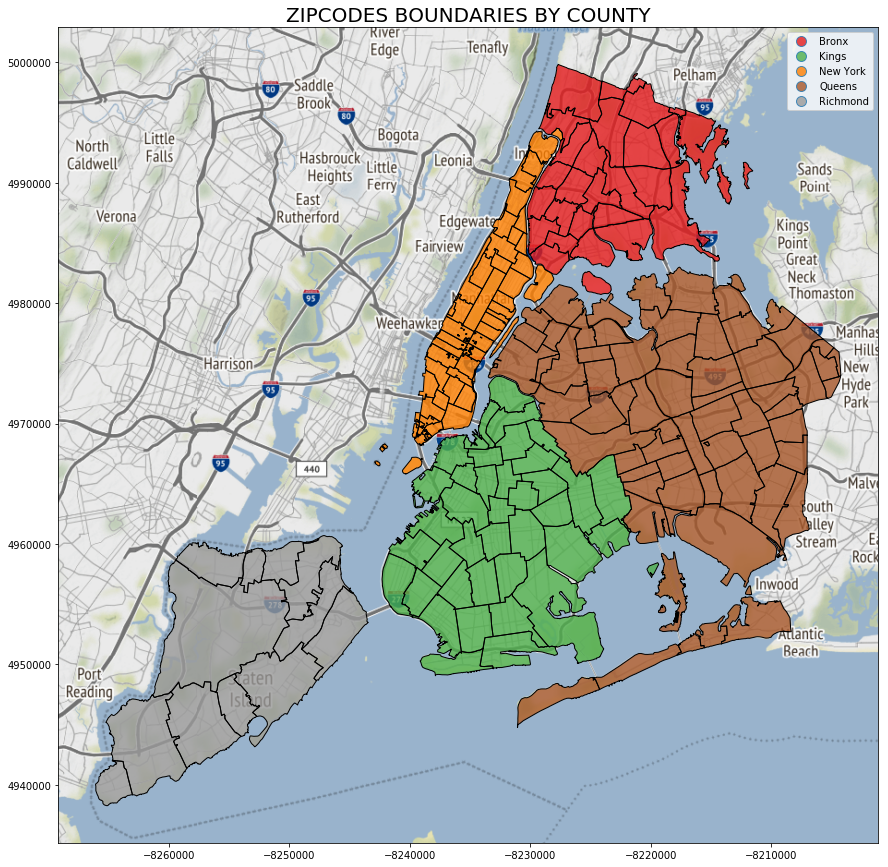

In [11]:
f, ax = plt.subplots(figsize=(15, 15))
zipcode_df.to_crs(epsg=3857).plot(ax=ax, alpha=0.8, edgecolor='k',  column='COUNTY', legend=True)
add_basemap(ax, zoom=11)
ax.set_title('ZIPCODES BOUNDARIES BY COUNTY', fontsize = 20)
plt.show()

The total number of areas of intervention we are working with is: 

In [11]:
print("Total Number of Zip Codes:", len(zipcode_df.ZIPCODE.unique()))

Total Number of Zip Codes: 248


## Collisions

### Collisions VS ZIPCODE

We first take a look at the distribution of accidents per zones:

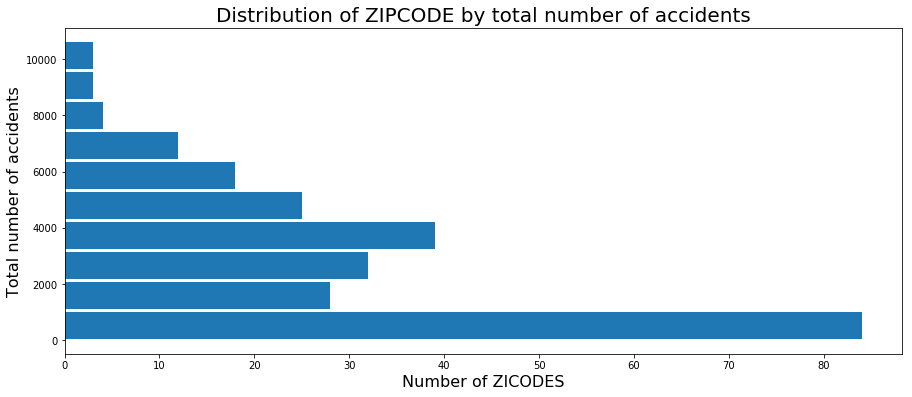

In [12]:
f, ax = plt.subplots(figsize=(15, 6))
target_train.reset_index().groupby('ZIPCODE')['n_collisions'].sum().reset_index()['n_collisions'].plot(kind='hist', ax=ax, bins=10, rwidth=0.9, orientation='horizontal')
ax.set_title("Distribution of ZIPCODE by total number of accidents", fontsize=20)
ax.set_xlabel("Number of ZICODES", fontsize=16)
ax.set_ylabel("Total number of accidents", fontsize=16)
plt.show()

In [13]:
target_train = pd.read_csv('./data/train_target.csv', index_col=[0,1], parse_dates=['DT'])

/home/hhours/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


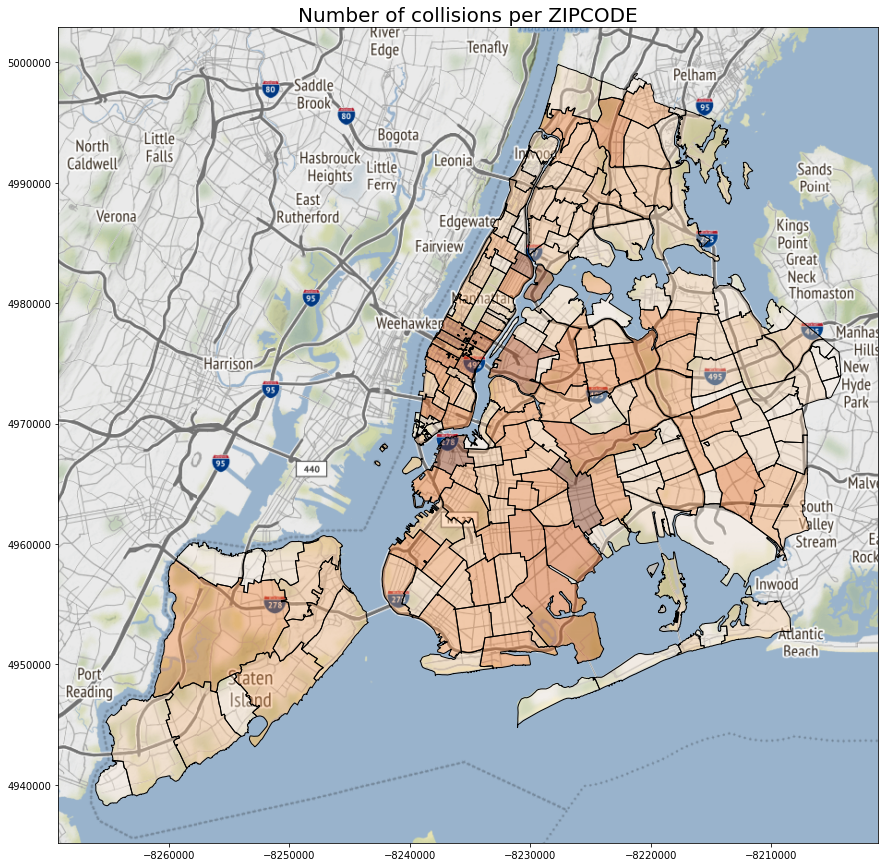

In [14]:
count_by_zip_gdf = target_train.reset_index().groupby('ZIPCODE')['n_collisions'].sum().to_frame()
count_by_zip_gdf.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(15, 15))
zipcode_df.merge(count_by_zip_gdf, left_on='ZIPCODE', right_on='ZIPCODE')\
                        .to_crs(epsg=3857)\
                        .plot(ax=ax, alpha=0.4, edgecolor='k', 
                              cmap = 'Oranges', column='n_collisions')
add_basemap(ax, zoom=11)
ax.set_title("Number of collisions per ZIPCODE", fontsize = 20)
plt.show()

We notice that some ZIPCODES are much more risky than others (up to 7000 accidents in total). 
These Zip codes will benefit most of our predictive module.

#### Imbalanced Data between collision and normal traffic

By looking at the data, we notice that there are far more time slots for which we have no accident ( number of collisions is 0 in our target variable). This will impact the performance of our model ! 

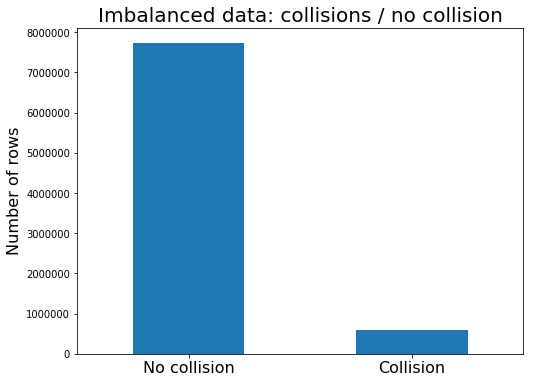

In [15]:
def test(x):
    return 'Collision' if x==1 else 'No collision'
f, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame([target_train[target_train['n_collisions']==0]['n_collisions'].count(), 
              target_train[target_train['n_collisions']!=0]['n_collisions'].count()])\
            .plot(kind='bar', ax=ax)
ax.set_title("Imbalanced data: collisions / no collision", fontsize=20)
ax.set_ylabel("Number of rows", fontsize=16)
ax.set_xticklabels(['No collision','Collision'], fontsize=16, rotation=0)
ax.get_legend().remove()
plt.show()


### Collisions VS Time

From a time perspective, the number of collisions seems to depend on the date / hour we are concidering (holidays, worktime,...):


In [16]:
import calendar
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [17]:
def format_fn(tick_val, tick_pos):
    test = {k: v for k,v in enumerate(calendar.month_abbr)}
    if int(tick_val) in range(13):
        return test[int(tick_val)]
    else:
        return ''

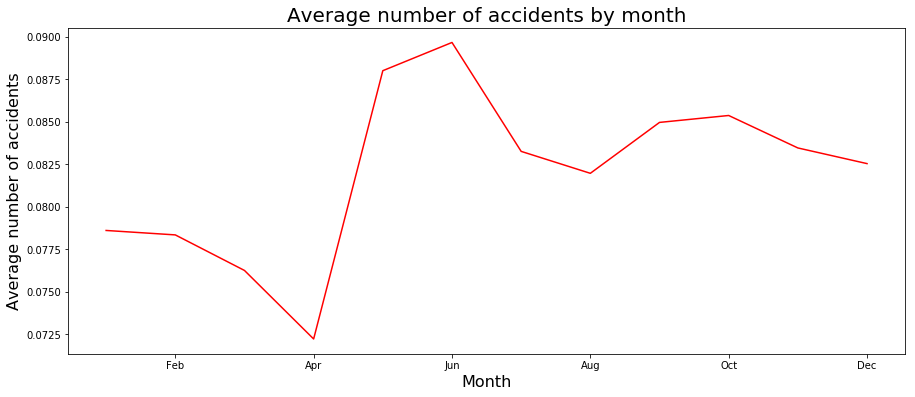

In [18]:
f, ax = plt.subplots(figsize=(15, 6))
target_train.reset_index(inplace= True)
target_train.groupby(target_train['DT'].dt.month)['n_collisions'].mean().plot(color ='red')
ax.set_title("Average number of accidents by month", fontsize=20)
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Average number of accidents", fontsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

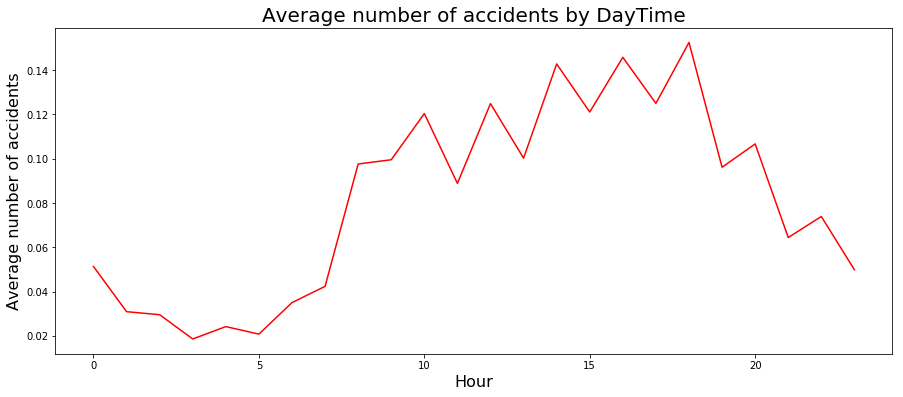

In [19]:
f, ax = plt.subplots(figsize=(15, 6))
target_train.groupby(target_train['DT'].dt.hour)['n_collisions'].mean().plot(color ='red')
ax.set_title("Average number of accidents by DayTime", fontsize=20)
ax.set_xlabel("Hour", fontsize=16)
ax.set_ylabel("Average number of accidents", fontsize=16)
plt.show()

As a result, having time related features as inputs of our model ( time of the day,  day of the week, ect...) might improve our performance.

## Traffic correlation to collisions

We investigate here if a denser traffic is correlated to an increase in accidents: 

<img src="img/3.jpg" width="1000">

In [20]:
data_train.reset_index(inplace=True)
#target_train.reset_index(inplace=True)

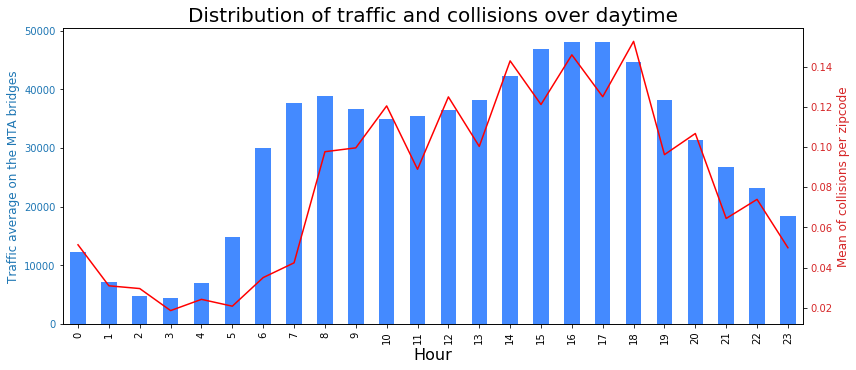

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:blue'
data_train.groupby(data_train['DT'].dt.hour)['nb_vehicles'].mean().plot(kind='bar', color ='#448AFF', ax=ax1)
ax1.set_ylabel('Traffic average on the MTA bridges', fontsize=12, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Hour', fontsize=16)
ax2 = ax1.twinx()#03A9F4
color = 'tab:red'
target_train.groupby(target_train['DT'].dt.hour)['n_collisions'].mean().plot(color ='red', ax=ax2)
ax2.set_ylabel('Mean of collisions per zipcode', fontsize=12, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title("Distribution of traffic and collisions over daytime", fontsize=20)
plt.show()

We observe the difference between the traffic/collisions on a weekday versus and the traffic/collisions on weekends (starting and finishing worktimes) by looking at the plots bellow:

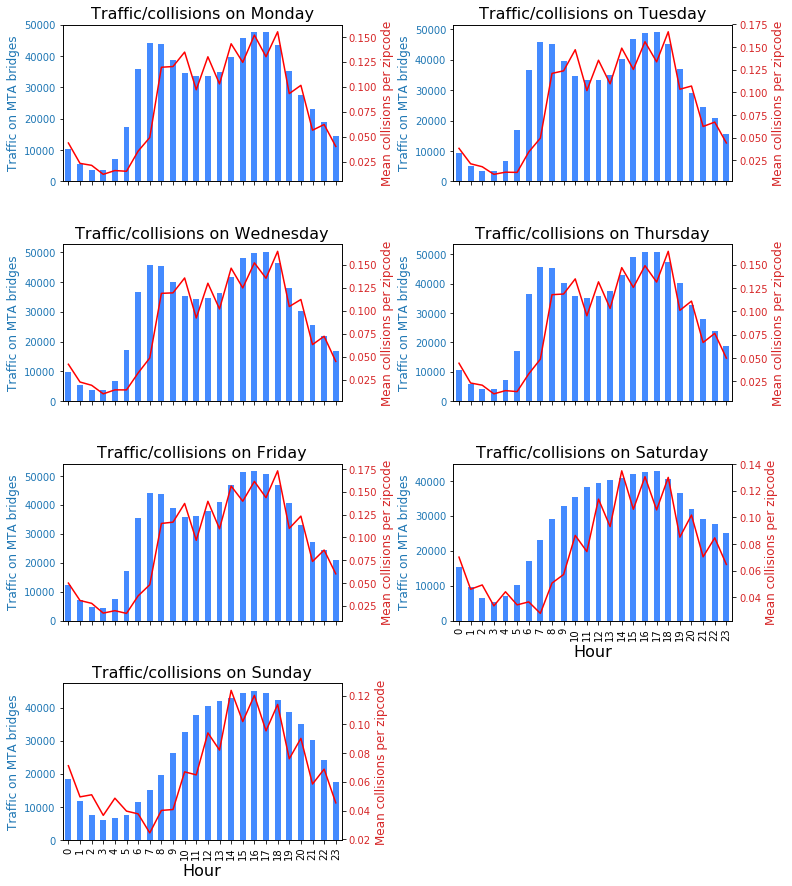

In [22]:
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']):
    ax = fig.add_subplot(4, 2, i+1)
    color = 'tab:blue'
    data_train[data_train['DT'].dt.dayofweek==i].groupby(data_train['DT'].dt.hour)['nb_vehicles'].mean().plot(kind='bar', color ='#448AFF', ax=ax)
    ax.set_ylabel('Traffic on MTA bridges', fontsize=12, color=color)
    ax.tick_params(axis='y', labelcolor=color)
    ax.set_xlabel('Hour', fontsize=16)
    ax.set_title("Traffic/collisions on "+ day, fontsize=16)

    ax2 = ax.twinx()
    color = 'tab:red'
    target_train[target_train['DT'].dt.dayofweek==i].groupby(target_train['DT'].dt.hour)['n_collisions'].mean().plot(color ='red', ax=ax2)
    ax2.set_ylabel('Mean collisions per zipcode', fontsize=12, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
plt.show()

## Weather impact on accidents toll 

What is the impact of harsh weather conditions on collision rates? 

<img src="img/4.png" width="1000">

In [23]:
df = data_train.copy()
df['n_collisions'] = target_train['n_collisions']

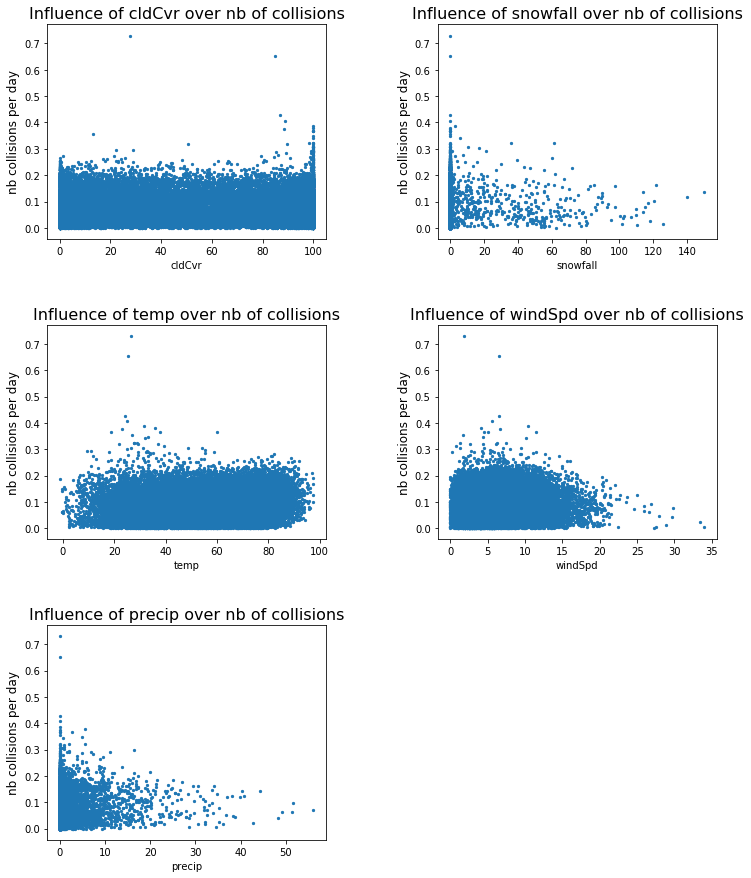

In [24]:
meteo_df = df.groupby(df['DT']).mean()
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(['cldCvr', 'snowfall', 'temp', 'windSpd', 'precip']):
    ax = fig.add_subplot(3, 2, i+1)
    meteo_df.plot.scatter(ax=ax, x=column, y='n_collisions', marker='.')
    ax.set_title("Influence of "+column+" over nb of collisions", fontsize=16)
    ax.set_ylabel("nb collisions per day", fontsize=12)

## Calls to 311 relation with accidents toll 

How complaints from NYC citizens can help us to anticipate incoming accidents toll?

<img src="img/5.jpg" width="1000">

Here we take a look at how higher noise levels and sidewalk problems relate to accidents in the city:

In [25]:
call311_df = df[df.columns[25:]]

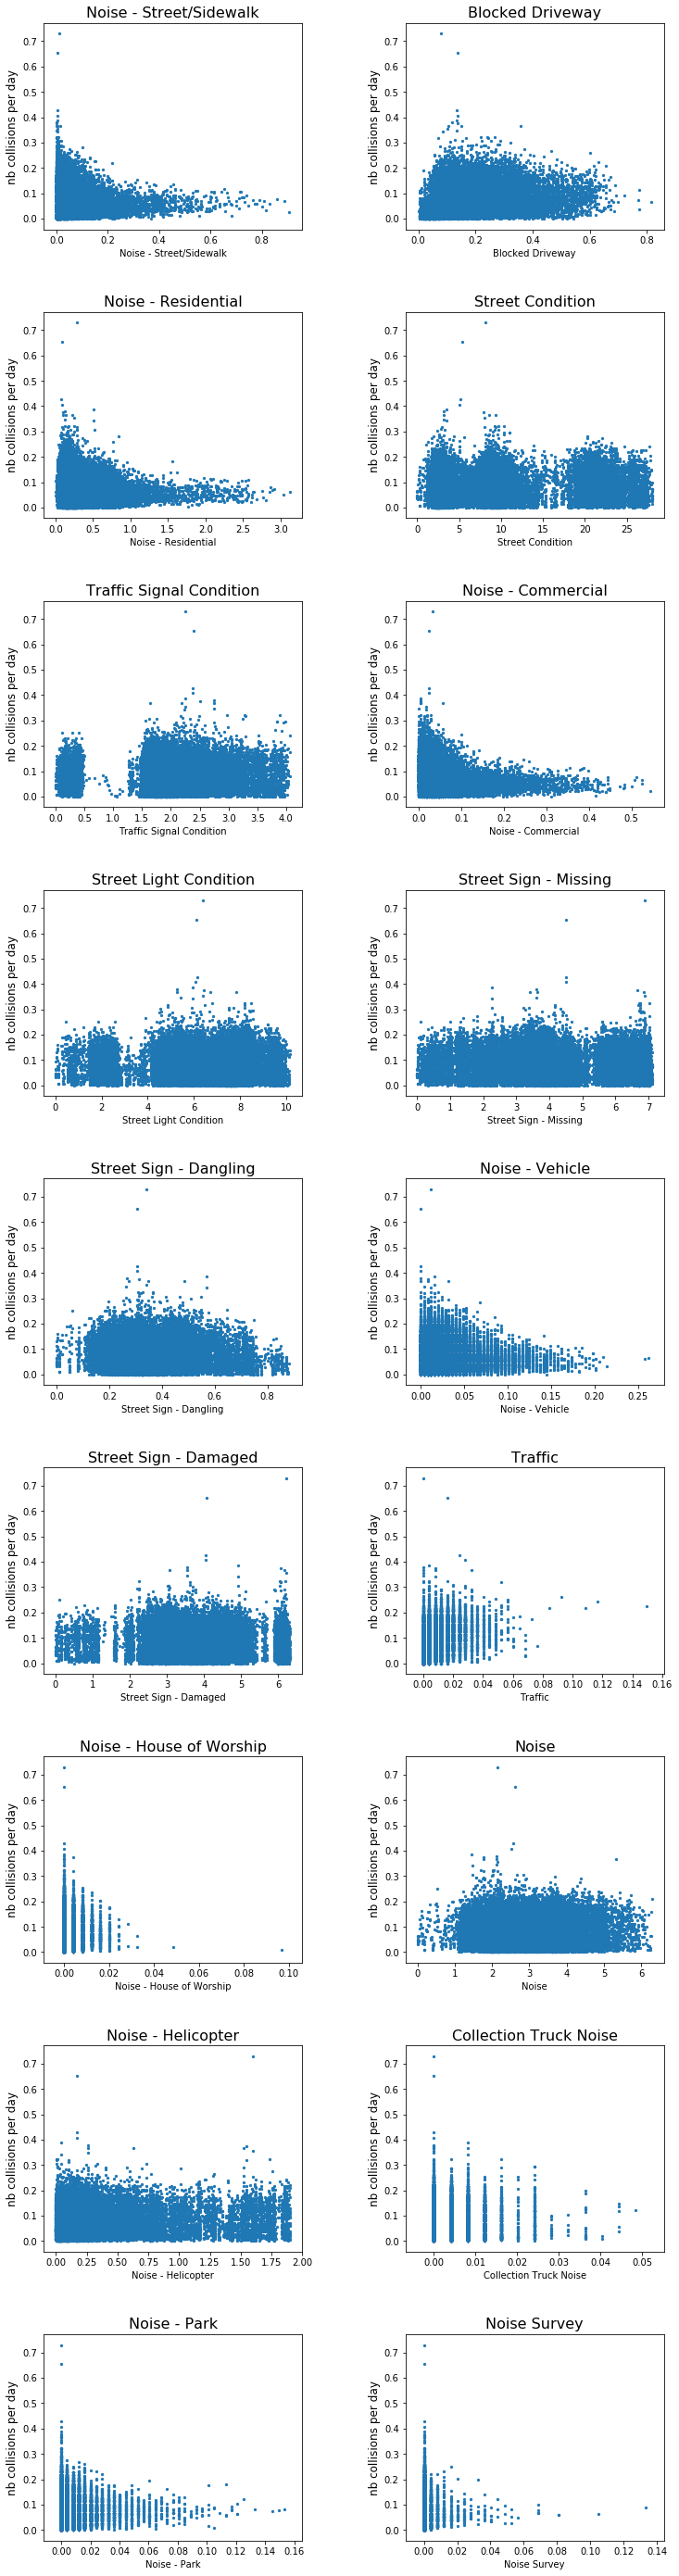

In [26]:
fig = plt.figure(figsize=(12, 50))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(call311_df.columns[:-2]):
    ax = fig.add_subplot(9, 2, i+1)
    meteo_df.plot.scatter(ax=ax, x=column, y='n_collisions', marker='.')
    ax.set_title(column, fontsize=16)
    ax.set_ylabel("nb collisions per day", fontsize=12)

In [27]:
data_train.set_index(['ZIPCODE','DT'], inplace= True)

In [28]:
target_train.set_index(['ZIPCODE','DT'], inplace= True)

## Uploading the test data: 

Now that we have taken a closer look at the variables we have in our train set, we load the test set bellow before modeling our use case: 

In [29]:
from problem import get_test_data_df

In [30]:
data_test, target_test = get_test_data_df()

/home/hhours/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
data_test.shape

(2773632, 42)

#  <a style="color:#6699ff">III. Model to submit</a>

## 1. Workflow

The task in this challenge is to predict the number of accident to happen in each zip code à every hour as accuratly as possible. This is a regression task, with the constraint that the predictions must be integers.

For submitting at the RAMP site, we will use two classes, saved in two different files:

    - a class FeatureExtractor, which will be used to extract features from the dataset for the regression task
    - a class Regressor to predict the outputs 



<img src="img/workflow.png" width="800">

## 2. Feature Extractor

The feature extractor implements a transform function. It is saved in the file submissions/starting_kit/feature_extractor.py. It receives the pandas dataframe X_df defined at the beginning of the notebook and output the dataframe with a few more columns. The new features are chosen based on our data exploration results above.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
import datetime
import math
import pandas as pd

class FeatureExtractor(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):        
        return self

    def transform(self, X_df):
        X_new = X_df.copy()
        X_new = extract_date_and_hour(X_new)
        return X_new  

    
# Examples of feature engineering

def extract_date_and_hour(df):
    df_new = df.reset_index().copy()
    df_new['Hour'] = df_new['DT'].apply(lambda x : x.hour )
    dfDummies = pd.get_dummies(df_new['Hour'], prefix = 'Hour')
    df_ = pd.concat([df.reset_index(), dfDummies], axis=1, sort=False)
    df_['WeekDay'] = df_new['DT'].apply(lambda x : 1 if (datetime.datetime.weekday(x) < 5) else 0 )
    df_.set_index(['ZIPCODE','DT'], inplace =True )
    return df_


def extract_date_data(df):
    df_new = df.reset_index().copy()
    df_new['IsWeekend'] = df_new['DT'].apply(lambda x : 1 if (datetime.datetime.weekday(x) >= 5) else 0)
    df_new['Hour_cos'] = df_new['DT'].apply(lambda x : math.cos(x.hour * (2 * math.pi / 24)))
    df_new['Hour_sin'] = df_new['DT'].apply(lambda x : math.sin(x.hour * (2 * math.pi / 24)))
    df_new['Month_cos'] = df_new['DT'].apply(lambda x : math.cos(x.month * (2 * math.pi / 12)))
    df_new['Month_sin'] = df_new['DT'].apply(lambda x : math.sin(x.month * (2 * math.pi / 12)))
    df_new['WeekDay_cos'] = df_new['DT'].apply(lambda x : math.cos(datetime.datetime.weekday(x) * (2 * math.pi / 7)))
    df_new['WeekDay_sin'] = df_new['DT'].apply(lambda x : math.sin(datetime.datetime.weekday(x) * (2 * math.pi / 7)))
    df_new.set_index(['ZIPCODE','DT'], inplace=True )
    return df_new

# Balance the number of zeros in our training set
def downsample_data(df, y, factor):
    df_new = df.copy()
    df_new['n_collisions'] = y
    df_new  = df_new.drop(df_new.query('n_collisions == 0').sample(frac=factor).index)
    df =  df_new.iloc[:,:-1]
    y = (df_new.iloc[:,-1]).values
    return df, y.reshape((len(y), 1))

## 3. Baseline Regressor

The regressor follows a classical scikit-learn regressor template. It should be saved in the file submissions/starting_kit/regressor.py.

In [33]:
from sklearn import linear_model
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class Regressor(BaseEstimator):
    def __init__(self):
        self.rgr = make_pipeline(StandardScaler(), linear_model.Ridge(alpha=.5))  #Including scaling within the pipeline

    def fit(self, X, y):
        self.rgr.fit(X, y.reshape((len(y), 1)))

    def predict(self, X):
        y_pred = self.rgr.predict(X)
        return y_pred.reshape((len(y_pred), 1))

In [34]:
model = make_pipeline(FeatureExtractor(), Regressor())

In [35]:
model.fit(data_train, target_train.values)

/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('regressor', Regressor())])

In [36]:
y_pred = model.predict(data_test)

/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [37]:
y_pred.shape

(2773632, 1)

## 4. Evaluation

### 4.1  Evaluating the model with our NRMSE : 

We start by importing our metric here: 

In [38]:
from problem import NRMSE

In [39]:
nrmse = NRMSE()

In [40]:
nrmse(target_test.values, y_pred)

0.3558816935175829

In [41]:
y_pred = y_pred.round().astype(int)

In [42]:
y_pred_ = pd.Series(y_pred.T[0])

In [43]:
y_pred_.describe()

count    2.773632e+06
mean     3.666672e-04
std      1.914505e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [44]:
target_test.describe()

,n_collisions
count,2.773632e+06
mean,7.915073e-02
std,3.147693e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.200000e+01


### 4.1  Recall VS Precision Trade-off: 

We can also investigate the initial recall and presion of this first approach:

In [45]:
from problem import Precision, Recall

In [46]:
y_pred_binary = y_pred_.apply(lambda x : 0 if (x == 0) else 1)

In [47]:
y_true_binary = target_test['n_collisions'].apply(lambda x : 0 if (x == 0) else 1)

In [48]:
prec = Precision()
rec = Recall()
print('Precion score: ', prec(target_test.values, y_pred))
print('Recall score: ', rec(target_test.values, y_pred))

Precion score:  0.1504424778761062
Recall score:  0.0008054157629866712


#  <a style="color:#6699ff">IV. Submitting on RAMP</a>

Once the modeling part is done, we test our submission using the ramp librairy. 

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., locally, and checking them with ramp_test_submission. The script prints mean cross-validation scores.

The scoring is based on our business metric 'nrmse' defined and tested in this notebook, as well as the values for the recall and precision of the accidents occurance:

In [50]:
!ramp_test_submission --submission starting_kit

Testing NYC_Num_of_accidents_prediction_
Reading train and test files from ./data ...
/home/hhours/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/hhours/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by